# Fuzzy C-Mean Clustering

## Konsep Dasar Fuzzy C-Mean Clustering

**PENGERTIAN**

Fuzzy C-Means (FCM) merupakan salah satu algoritma clustering unsupervised learning yang digunakan untuk mengelompokkan data ke dalam sejumlah cluster tertentu berdasarkan kedekatan fitur, dengan konsep utama bahwa satu data bisa menjadi anggota lebih dari satu klaster dengan tingkat derajat keanggotaan tertentu (nilai derajat keanggotaan antara 0 sampai 1) tidak seperti k-means yang bersifat keras (hard clustering).

Konsep utama dari Fuzzy C-Means Clustering didasarkan pada prinsip bahswa setiap data tidak harus mutlak masuk ke satu klaster, melainkan memiliki derajat keanggotaan yang menunjukkan seberapa besar keterkaitannya dengan masing-masing klaster. Derajat keanggotaan ini dinyatakan dengan nilai antara 0 sampai 1, dan untuk setiap data, jumlah total nilai keanggotaannya ke seluruh klaster harus sama dengan 1.

Beberapa elemen utama dalam algortima FCM meliputi:


*   Data point: Sekumpulan objek atau entitas yang akan dibagi ke dalam klaster.
*   Centroid: Titik pusat dari masing-masing klaster yang terus diperbarui selama proses iterasi.
*   Matriks Keanggotaan Fuzzy (U):Matriks yang menyimpan nilai keanggotaan masing-masing data terhadapt setiap klaster.
*   Parameter Fuzziness (m): Sebuah konstanta yang menentukan tingkat keburaman (biasanya m=2). Semakin besar nilai m, semakin kabur keanggotaan suatu dasar pada cluster.







## Algoritma Fuzzy C-Mean Clustering



1.   Inisialisasi
  * Pilih jumlah kluster c
  * Pilih nilai fuzzifier m
  * Pilih batas toleransi error ε
  * Inisialisasi matriks keanggotaan awal secara acak, dengan syarat:

  $$
  ∑_{i=1}^c U_{ik} =1,  ∀k
  $$


2.   Hitung Pusat Kluster V

   $$
   v_j = \frac{\sum_{i=1}^n (U_{ij})^m \cdot x_i}{\sum_{i=1}^n (U_{ij})^m}
   $$

   Di mana:

   * $v_j$ adalah pusat cluster ke-j
   * $x_i$ adalah data ke-i
   * $U_{ij}$ adalah nilai keanggotaan data ke-i terhadap cluster ke-j

3.   Update Derajat Keanggotaan Matrix

   $$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

   Di mana:

   * $\|x_i - v_j\|$ adalah jarak antara data ke-i dengan pusat cluster ke-j

4.   Cek Konvergensi

   * Jika perubahan nilai *membership matrix* kurang dari ε atau sudah mencapai iterasi maksimum, maka proses dihentikan.
   * Jika belum, kembali ke langkah 2.

5.   Tentukan Kluster Akhir

  * Untuk setiap data $x_j$, tentukan kluster utamanya berdasarkan nilai $u_{ij}$ tertinggi.



## Contoh Manual Perhitungan Fuzzy C-Mean Clustering

### Data
Misalnya kita punya 4 data satu dimensi:

$$
X = \{1, 2, 5, 6\}
$$

**Jumlah Cluster (c):** 2
**Tingkat Fuzziness (m):** 2 (umumnya digunakan)
**Kriteria Konvergensi:** perbedaan pusat cluster < 0.01



### Langkah 1: Inisialisasi Matriks Keanggotaan $U$

Ukuran matriks: $c \times n = 2 \times 4$

Misalkan kita mulai dari:

$$
U^{(0)} =
\begin{bmatrix}
0.6 & 0.5 & 0.4 & 0.3 \\
0.4 & 0.5 & 0.6 & 0.7 \\
\end{bmatrix}
$$

Sudah memenuhi syarat:
Jumlah keanggotaan tiap data = 1
Contoh: $0.6 + 0.4 = 1$, $0.5 + 0.5 = 1$, dst.



### Langkah 2: Hitung Pusat Cluster (Centroid)

Rumus:

$$
v_j = \frac{\sum_{i=1}^{n} u_{ji}^m \cdot x_i}{\sum_{i=1}^{n} u_{ji}^m}
$$

#### Untuk cluster 1:

$$
v_1 = \frac{(0.6^2 \cdot 1) + (0.5^2 \cdot 2) + (0.4^2 \cdot 5) + (0.3^2 \cdot 6)}{0.6^2 + 0.5^2 + 0.4^2 + 0.3^2}
= \frac{0.36 + 0.5 + 0.8 + 0.54}{0.36 + 0.25 + 0.16 + 0.09}
= \frac{2.2}{0.86}
\approx 2.558
$$

#### Untuk cluster 2:

$$
v_2 = \frac{(0.4^2 \cdot 1) + (0.5^2 \cdot 2) + (0.6^2 \cdot 5) + (0.7^2 \cdot 6)}{0.4^2 + 0.5^2 + 0.6^2 + 0.7^2}
= \frac{0.16 + 0.5 + 1.8 + 2.94}{0.16 + 0.25 + 0.36 + 0.49}
= \frac{5.4}{1.26}
\approx 4.286
$$



### Langkah 3: Update Matriks Keanggotaan $U$

Rumus:

$$
u_{ji} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_i, v_j)}{d(x_i, v_k)}\right)^{\frac{2}{m-1}}}
$$

#### Contoh untuk data $x_1 = 1$:

* $d(x_1, v_1) = |1 - 2.558| = 1.558$
* $d(x_1, v_2) = |1 - 4.286| = 3.286$

$$
u_{1,1} = \frac{1}{\left(\frac{1.558}{1.558}\right)^2 + \left(\frac{1.558}{3.286}\right)^2}
= \frac{1}{1 + (0.474)^2}
= \frac{1}{1 + 0.2247}
\approx 0.816
$$

$$
u_{2,1} = 1 - u_{1,1} \approx 0.184
$$

Ulangi untuk semua data dan cluster.



### Langkah 4: Cek Konvergensi

Bandingkan perubahan centroid $v_j$ dengan iterasi sebelumnya. Jika perubahan semua centroid < 0.01, maka **konvergen**.

Jika belum, **ulang ke Langkah 2** dengan $U$ yang baru.



### Fungsi Objektif $J_m$

Rumus:

$$
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ji}^m \cdot d^2(x_i, v_j)
$$

Dengan $m = 2$, dan hasil sebelumnya (misalnya iterasi awal):

$$
J_m = (0.6^2 \cdot (1 - 2.558)^2) + (0.5^2 \cdot (2 - 2.558)^2) + \dots
$$

Lanjutkan hingga menjumlahkan seluruh nilai dari 2 cluster dan 4 data. Nilai fungsi objektif ini **harus menurun** setiap iterasi.

Berikut adalah hasil perhitungan **Fuzzy C-Means (FCM)** secara manual hingga **konvergen**, dengan 4 data satu dimensi: $X = \{1, 2, 5, 6\}$, 2 cluster, dan $m = 2$:

---

### Iterasi Detail:

| Iterasi | Centroid 1 | Centroid 2 | Fungsi Objektif $J_m$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | --------------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     2.5581 |     4.2857 |                7.6292 |  0.6000 |  0.5000 |  0.4000 |  0.3000 |  0.4000 |  0.5000 |  0.6000 |  0.7000 |
|       2 |     1.6944 |     5.3258 |                2.2525 |  0.8164 |  0.9437 |  0.0788 |  0.1988 |  0.1836 |  0.0563 |  0.9212 |  0.8012 |
|       3 |     1.5100 |     5.4911 |                0.9928 |  0.9749 |  0.9916 |  0.0096 |  0.0239 |  0.0251 |  0.0084 |  0.9904 |  0.9761 |
|       4 |     1.4977 |     5.5024 |                0.9839 |  0.9873 |  0.9807 |  0.0194 |  0.0127 |  0.0127 |  0.0193 |  0.9806 |  0.9873 |

---

### Konvergensi tercapai pada Iterasi ke-4

Perubahan centroid sudah di bawah ambang batas $\epsilon = 0.01$

---

### Interpretasi:

* **Centroid Akhir:**

  * Cluster 1: \~1.4977 (data 1 & 2)
  * Cluster 2: \~5.5024 (data 5 & 6)

* **Fungsi Objektif $J_m$** menurun dari 7.63 → 2.25 → 0.99 → 0.98, menunjukkan **konvergensi stabil**.


## Implementasi Python

In [20]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([1, 2, 5, 6])  # Data satu dimensi
c = 2                      # Jumlah cluster
m = 2.0                    # Tingkat fuzziness
epsilon = 0.01             # Ambang batas konvergensi
max_iter = 100             # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.6, 0.5, 0.4, 0.3],
    [0.4, 0.5, 0.6, 0.7]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk update U
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_ratio = abs(X[i] - V[j]) / abs(X[i] - V[k]) if abs(X[i] - V[k]) != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration+1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame agar mudah dibaca
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
df_results.round(4)  # Pembulatan 4 desimal untuk keterbacaan



,Iterasi,Centroid 1,Centroid 2,Objektif,"U[1,1]","U[1,2]","U[1,3]","U[1,4]","U[2,1]","U[2,2]","U[2,3]","U[2,4]"
0,1,2.5581,4.2857,7.6292,0.6000,0.5000,0.4000,0.3000,0.4000,0.5000,0.6000,0.7000
1,2,1.6944,5.3258,2.2525,0.8164,0.9437,0.0788,0.1988,0.1836,0.0563,0.9212,0.8012
2,3,1.5100,5.4911,0.9928,0.9749,0.9916,0.0096,0.0239,0.0251,0.0084,0.9904,0.9761
3,4,1.4977,5.5024,0.9839,0.9873,0.9807,0.0194,0.0127,0.0127,0.0193,0.9806,0.9873


## Implementasi Fuzzy C-Mean Untuk Data Iris 3 Cluster

In [1]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.2 MB/s eta 0:00:00


### Menyiapkan Library yang Digunakan

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

### Mengambil dan Menggabungkan Data dari Database, dan Memisahkan Outliernya


Mengambil data iris di dua database lalu menggabungkan keduanya. Terdapat 4 kolom data yakni id, class, petal length, petal width, sepal length, dan sepal width.

In [6]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-8eb1f4b-posgresqltugas2.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ycUbNT1QT31C8JC_cFL",
        database="defaultdb",
        port=10681
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_progres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="posgresqltugas2-sqltugas2.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_wYxnNK8agAOz67Wu1Ok",
        database="amelia",
        port=12195
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  outlier_label
  1     Iris-setosa          14.0         20.0          51.0         35.0             -1
  2     Iris-setosa          14.0         20.0          40.9         30.0             -1
  3     Iris-setosa          13.0         20.0          47.0         32.0             -1
  4     Iris-setosa          15.0         20.0          46.0         31.0             -1
  5     Iris-setosa          14.0         20.0          50.0         36.0             -1
  6     Iris-setosa           1.7          0.4          54.0         39.0             -1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

### Visualisasi Data

#### Visualisasi Data Asli Tanpa Outlier dan Tanpa Menggunakan PCA

Visualisasi data iris 2D tanpa menggunakan PCA

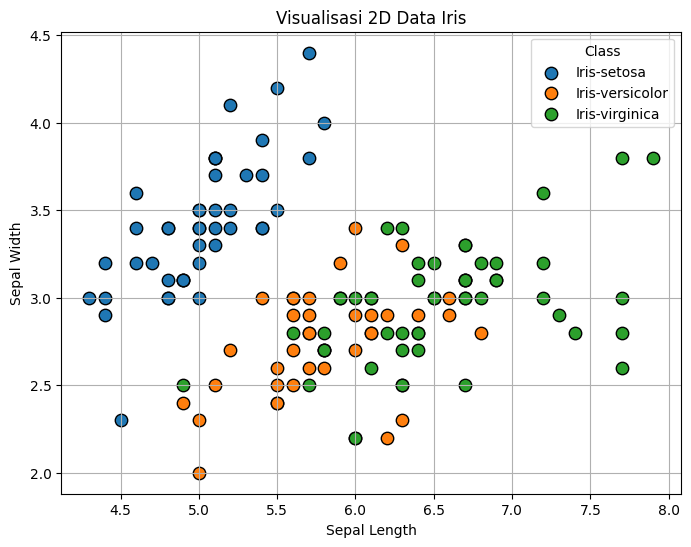

In [8]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

Visualisasi data iris 3D tanpa menggunakan PCA

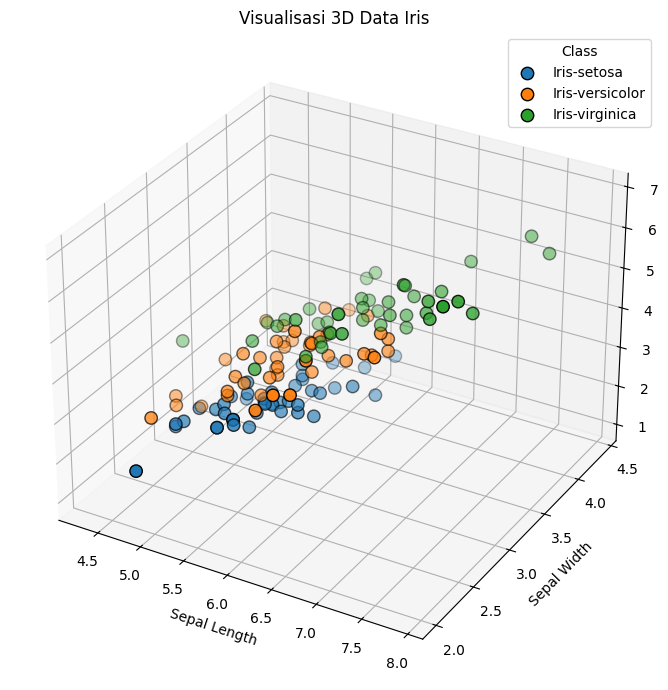

In [9]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi Data Asli Tanpa Outlier Menggunakan PCA

Visualisasi data iris 2D menggunakan PCA

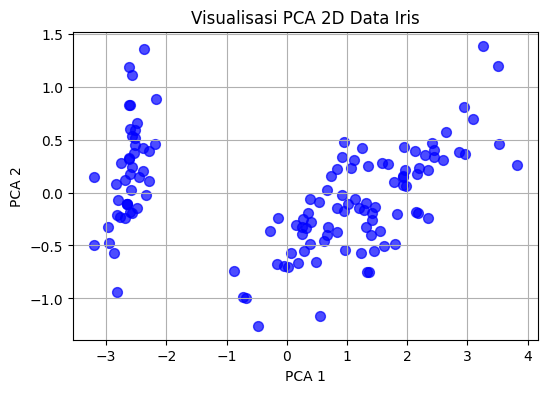

In [10]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Visualisasi data iris 3D menggunakan PCA

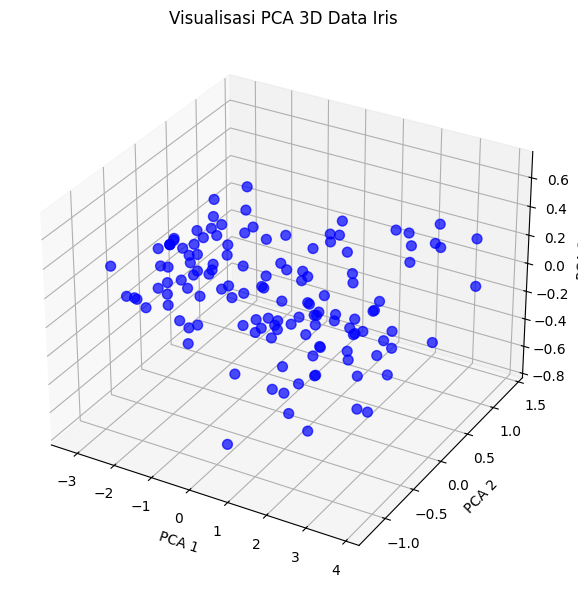

In [11]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

### Preprocessing dan Reduksi Dimensi

### Standarisasi Menggunakan MinMaxScaler

Cara kerja MinMaxScaler ialah mengubah setiap nilai pada fitur dengan rentang nilai antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Dengan begitu tidak ada fitur yang mendominasi proses perhitungan hanya karena memiliki nilai yang lebih besar.

Rumus:
$$
{Xscaled = (X - Xmin) / (Xmax - Xmin)}
$$

In [12]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Data hasil standarisasi menggunakan MinMaxScaler

In [13]:
print (scaled_features);

[[0.06779661 0.08333333 0.08333333 0.58333333]
 [0.08474576 0.04166667 0.19444444 0.58333333]
 [0.06779661 0.04166667 0.02777778 0.375     ]
 [0.08474576 0.         0.16666667 0.45833333]
 [0.08474576 0.04166667 0.30555556 0.70833333]
 [0.10169492 0.04166667 0.13888889 0.58333333]
 [0.06779661 0.         0.13888889 0.41666667]
 [0.01694915 0.         0.         0.41666667]
 [0.03389831 0.04166667 0.41666667 0.83333333]
 [0.08474576 0.125      0.38888889 1.        ]
 [0.05084746 0.125      0.30555556 0.79166667]
 [0.06779661 0.08333333 0.22222222 0.625     ]
 [0.11864407 0.08333333 0.38888889 0.75      ]
 [0.08474576 0.08333333 0.22222222 0.75      ]
 [0.11864407 0.04166667 0.30555556 0.58333333]
 [0.08474576 0.125      0.22222222 0.70833333]
 [0.         0.04166667 0.08333333 0.66666667]
 [0.11864407 0.16666667 0.22222222 0.54166667]
 [0.15254237 0.04166667 0.13888889 0.58333333]
 [0.10169492 0.04166667 0.19444444 0.41666667]
 [0.10169492 0.125      0.19444444 0.58333333]
 [0.08474576 

### Clustering menggunakan Fuzzy C-Means

#### Clustering dengan 2 Cluster

Visualisasi 2D pada data iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6123
Fuzzy Partition Coefficient (FPC): 0.8559
Objective Function Value (Jm): 9.1307
Cluster Centers (in scaled feature space):
[[0.10265041 0.08328481 0.20511464 0.56997164]
 [0.67227004 0.67152135 0.55574103 0.37310638]]
Objective Function Values per Iteration:
Iterasi 01: 22.6264
Iterasi 02: 17.9673
Iterasi 03: 17.8984
Iterasi 04: 17.3740
Iterasi 05: 14.5245
Iterasi 06: 9.9215
Iterasi 07: 9.1436
Iterasi 08: 9.1308
Iterasi 09: 9.1307


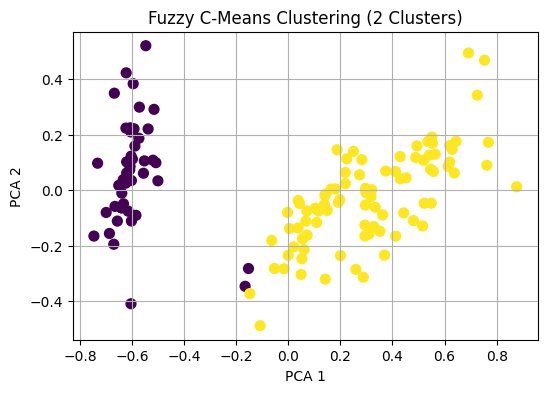

In [14]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Visualisasi 3D pada data iris setelah clustering

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6123
Fuzzy Partition Coefficient (FPC): 0.8559
Objective Function Value (Jm): 9.1307
Cluster Centers (in scaled feature space):
[[0.10265041 0.08328481 0.20511464 0.56997164]
 [0.67227004 0.67152135 0.55574103 0.37310638]]
Objective Function Values per Iteration:
Iterasi 01: 22.6264
Iterasi 02: 17.9673
Iterasi 03: 17.8984
Iterasi 04: 17.3740
Iterasi 05: 14.5245
Iterasi 06: 9.9215
Iterasi 07: 9.1436
Iterasi 08: 9.1308
Iterasi 09: 9.1307


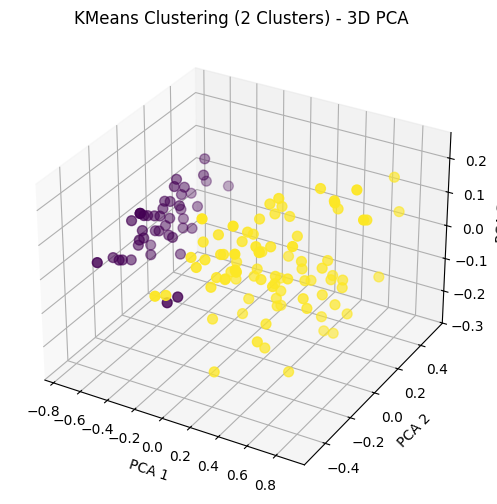

In [15]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


#### Clustering dengan 3 Cluster

Visualisasi 2D pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4940
Fuzzy Partition Coefficient (FPC): 0.7446
Objective Function Value (Jm): 4.6894
Cluster Centers (in scaled feature space):
[[0.56150863 0.5222549  0.42800022 0.30599302]
 [0.76878919 0.81164178 0.67384631 0.44122642]
 [0.08369026 0.06399824 0.19801482 0.58712429]]
Objective Function Values per Iteration:
Iterasi 01: 15.5301
Iterasi 02: 11.5642
Iterasi 03: 9.5898
Iterasi 04: 5.9888
Iterasi 05: 4.9401
Iterasi 06: 4.7626
Iterasi 07: 4.7137
Iterasi 08: 4.6982
Iterasi 09: 4.6927
Iterasi 10: 4.6906
Iterasi 11: 4.6899
Iterasi 12: 4.6896
Iterasi 13: 4.6895
Iterasi 14: 4.6894
Iterasi 15: 4.6894
Iterasi 16: 4.6894


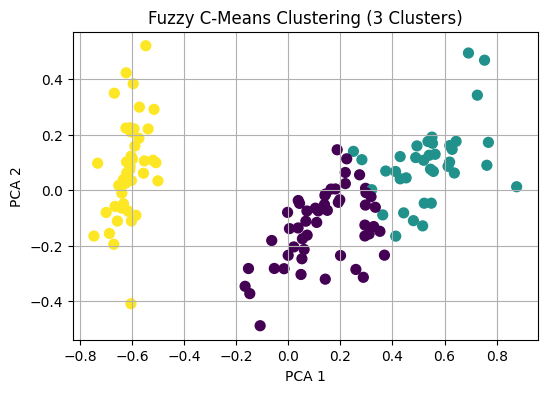

In [16]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Visualisasi 3D pada data Iris setelah clustering

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4940
Fuzzy Partition Coefficient (FPC): 0.7446
Objective Function Value (Jm): 4.6894
Cluster Centers (in scaled feature space):
[[0.56150863 0.5222549  0.42800022 0.30599302]
 [0.76878919 0.81164178 0.67384631 0.44122642]
 [0.08369026 0.06399824 0.19801482 0.58712429]]
Objective Function Values per Iteration:
Iterasi 01: 15.5301
Iterasi 02: 11.5642
Iterasi 03: 9.5898
Iterasi 04: 5.9888
Iterasi 05: 4.9401
Iterasi 06: 4.7626
Iterasi 07: 4.7137
Iterasi 08: 4.6982
Iterasi 09: 4.6927
Iterasi 10: 4.6906
Iterasi 11: 4.6899
Iterasi 12: 4.6896
Iterasi 13: 4.6895
Iterasi 14: 4.6894
Iterasi 15: 4.6894
Iterasi 16: 4.6894


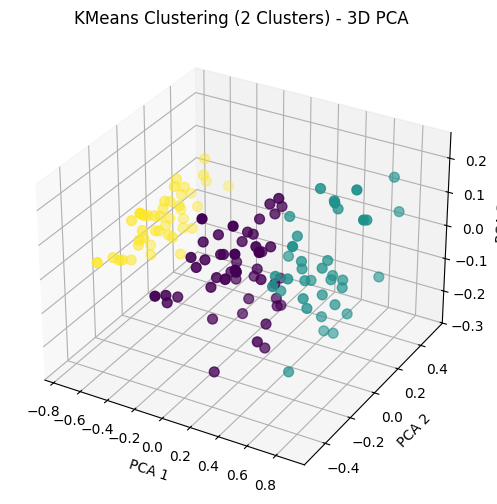

In [17]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


#### Clustering dengan 4 Cluster

Visualisasi 2D pada data iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4326
Fuzzy Partition Coefficient (FPC): 0.6515
Objective Function Value (Jm): 3.3981
Cluster Centers (in scaled feature space):
[[0.50873922 0.4667991  0.36890808 0.26669682]
 [0.79223475 0.85536731 0.71101307 0.46819493]
 [0.08160726 0.06144549 0.19720397 0.58927636]
 [0.65416932 0.63985444 0.53093568 0.36421229]]
Objective Function Values per Iteration:
Iterasi 01: 11.8375
Iterasi 02: 8.7723
Iterasi 03: 7.5967
Iterasi 04: 5.0863
Iterasi 05: 4.4505
Iterasi 06: 4.0543
Iterasi 07: 3.6627
Iterasi 08: 3.4897
Iterasi 09: 3.4191
Iterasi 10: 3.4020
Iterasi 11: 3.3990
Iterasi 12: 3.3984
Iterasi 13: 3.3982
Iterasi 14: 3.3982
Iterasi 15: 3.3981
Iterasi 16: 3.3981
Iterasi 17: 3.3981
Iterasi 18: 3.3981
Iterasi 19: 3.3981


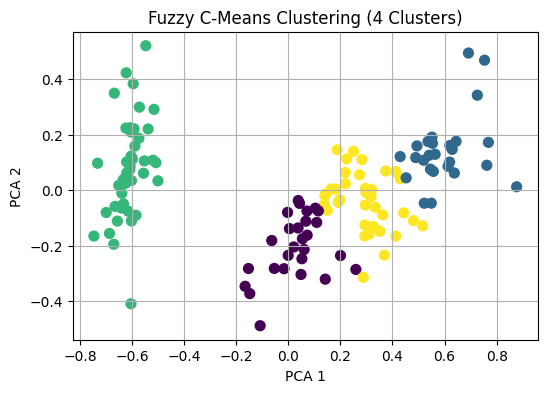

In [18]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Visualisasi 3D pada data iris setelah clustering

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4326
Fuzzy Partition Coefficient (FPC): 0.6515
Objective Function Value (Jm): 3.3981
Cluster Centers (in scaled feature space):
[[0.50873922 0.4667991  0.36890808 0.26669682]
 [0.79223475 0.85536731 0.71101307 0.46819493]
 [0.08160726 0.06144549 0.19720397 0.58927636]
 [0.65416932 0.63985444 0.53093568 0.36421229]]
Objective Function Values per Iteration:
Iterasi 01: 11.8375
Iterasi 02: 8.7723
Iterasi 03: 7.5967
Iterasi 04: 5.0863
Iterasi 05: 4.4505
Iterasi 06: 4.0543
Iterasi 07: 3.6627
Iterasi 08: 3.4897
Iterasi 09: 3.4191
Iterasi 10: 3.4020
Iterasi 11: 3.3990
Iterasi 12: 3.3984
Iterasi 13: 3.3982
Iterasi 14: 3.3982
Iterasi 15: 3.3981
Iterasi 16: 3.3981
Iterasi 17: 3.3981
Iterasi 18: 3.3981
Iterasi 19: 3.3981


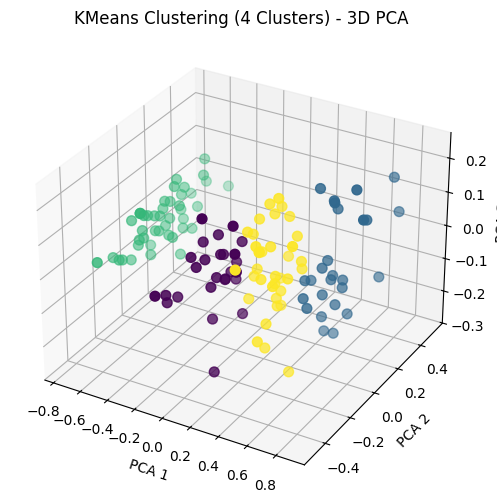

In [19]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
